# ⛈️ ⛈️ Control of stormwater systems using pyswmm ⛈️ ⛈️

## Objective:
This notebook aims to help users get started with using pyswmm for simulating real-time control in stormwater systems. This notebook comprises a demo and two exercises to help the users familiarize themself with the pyswmm workflow.


## Introduction
**pyswmm** is a python wrapper for controlling [EPA-SWMM's simulation engine](https://www.epa.gov/water-research/storm-water-management-model-swmm). pyswmm is available in PyPI and on Github. pyswmm enables us to pause the simulation, query the states, make the necessary modification, and resume the simulation. We rely on pyswmm for simulating real-time control in stormwater systems. EPA-SWMM's solver uses the dynamics wave equation for routing flows in the stormwater network. This solver enables us to simulate hydraulic phenomena like backwater propagation which can arise with control. This makes EPA SWMM an ideal choice for simulating control in stormwater systems.

This notebook demonstrates how users can use pyswmm for controlling valve outlets in the stormwater network. In this notebook, we use a simple synthetic stormwater network from pystorms (scenario theta) for illustrating the use of pyswmm. 


![Scenario Theta](./theta.png)

#### Model IDs
P1 and P2 are the IDs of Basins. 1 and 2 are IDs of the controllable orifice for Basins P1 and P2 respectively. 8 is the ID of the link carrying water into the outlet.  

### Example pyswmm workflow for controlling stormwater systems

In [1]:
import pyswmm
import pystorms
import matplotlib.pyplot as plt

In [3]:
# RC parms for pertty plots
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-dark-palette')

In [5]:
# Get the input file
input_file = pystorms.networks.load_network("theta")
print(f"Input file path: {input_file}")

Input file path: /Users/pluto/Archive/dev/pystorms/venv/lib/python3.9/site-packages/pystorms/networks/theta.inp


**NOTE**: EPA-SWMM uses *.inp* file for representing a stormwater network

In [6]:
# Create data loggers
simulation_time = []
depth = []
flows = []

In [7]:
# Open the simulation
with pyswmm.Simulation(inputfile=input_file) as sim:
    # Initialize nodes and links objects
    nodes = pyswmm.Nodes(sim)
    link = pyswmm.Links(sim)
    
    # Specify the link or nodes that we are interested in monitoring
    node_P1 = nodes['P1']
    link_8 = link['8']
    orifice_P1 = link['1']
    # Progress through the simulation
    for step in sim:
        # Log the simulation time
        simulation_time.append(sim.current_time)
        
        # Log the depth and low
        depth.append(node_P1.depth)
        flows.append(link_8.flow)
        
        # Set the valve opening in basin 1 to half open; values range from 0 to 1
        # 0 being closed and 1 being fully open.
        orifice_P1.target_setting = 0.50


 o  Retrieving project data

Text(0.5, 0, 'Simulation Time')

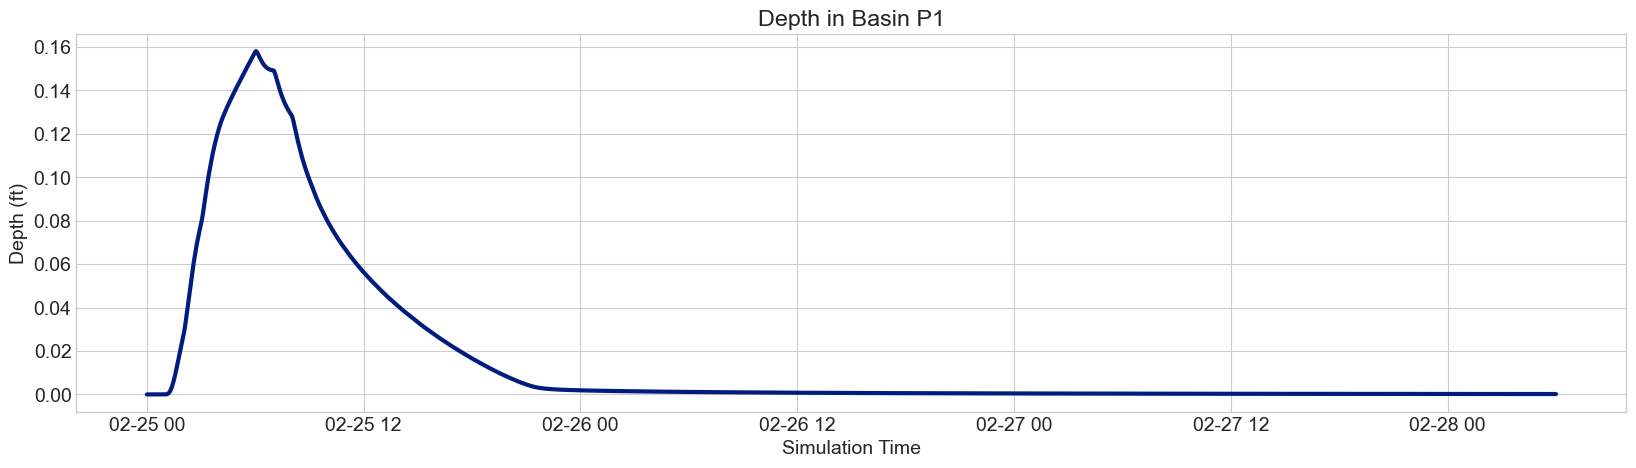

In [11]:
plt.figure(figsize=(20, 5), dpi=100)
plt.plot(simulation_time, depth, linewidth=3.0)
plt.title("Depth in Basin P1")
plt.ylabel("Depth (ft)")
plt.xlabel("Simulation Time")

### Exercise 1
Building on the code above, plot the water level in the Node P2.

In [29]:
# Get the input file
input_file = pystorms.networks.load_network("theta")

# Create lists for logging data


# Initalize the simulation object
with pyswmm.Simulation(inputfile=input_file) as sim:
    # <your code goes here>
    pass


 o  Retrieving project data

### Exercise 2
Develop a control logic that uses depth in Node P2 to regulate the orifice of Node P2 (orifice ID:2) and plot the flows going into the outlet(Link id: 8).

In [9]:
# Get the input file
input_file = pystorms.networks.load_network("theta")

# Create lists for logging data


# Initalize the simulation object
with pyswmm.Simulation(inputfile=input_file) as sim:
    # <your code goes here>
    pass


 o  Retrieving project data

### Bonus Question 💪
Develop a rule based control algorithm for maintaining flows into the outlet below 0.5 cu.ft per sec. 